In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.metrics import AUC
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import SimpleRNN, LSTM, Dropout, Flatten, Dense
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
import logging
tf.get_logger().setLevel(logging.ERROR)

In [2]:
# This code imports the data you generated before for replicating.
stock_prices = pd.read_csv('stock_prices.csv')
arima_predictions_T = pd.read_csv('arima_predictions_T')
diff_T = stock_prices['T'].diff().dropna()
split = int(len(diff_T.values)*0.95)
diff_train_T = diff_T.iloc[:split]
diff_test_T = diff_T.iloc[split:]

In [3]:
n_steps = 10
n_features = 1

In [4]:
# This code is imported from the previous milestone for replicating.

def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [5]:
X_diff_train_T, y_diff_train_T = split_sequence(diff_train_T, n_steps)
X_diff_train_T = X_diff_train_T.reshape((X_diff_train_T.shape[0],
                                         X_diff_train_T.shape[1], n_features))

X_diff_test_T, y_diff_test_T = split_sequence(diff_test_T.values, n_steps)
X_diff_test_T = X_diff_test_T.reshape((X_diff_test_T.shape[0],
                                       X_diff_test_T.shape[1], n_features))

In [6]:
def LSTM_part():
    model = Sequential()
    model.add(LSTM(256,
              input_shape=(n_steps, n_features),
              return_sequences=True))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer = 'adam' , loss='mean_squared_error',metrics=['mse'])
    return model
LSTM_model = LSTM_part()


In [7]:
LSTM_model = LSTM_part()
history_LSTM = LSTM_model.fit(X_diff_train_T, y_diff_train_T,
                            batch_size=200,
                            epochs=200,
                            validation_split=0.2)

Epoch 1/200
2/2 [==============================] - 2s 389ms/step - loss: 0.3864 - mse: 0.3864 - val_loss: 0.0960 - val_mse: 0.0960
Epoch 2/200
2/2 [==============================] - 0s 60ms/step - loss: 0.3730 - mse: 0.3730 - val_loss: 0.0966 - val_mse: 0.0966
Epoch 3/200
2/2 [==============================] - 0s 60ms/step - loss: 0.3633 - mse: 0.3633 - val_loss: 0.0977 - val_mse: 0.0977
Epoch 4/200
2/2 [==============================] - 0s 59ms/step - loss: 0.3541 - mse: 0.3541 - val_loss: 0.0985 - val_mse: 0.0985
Epoch 5/200
2/2 [==============================] - 0s 64ms/step - loss: 0.3426 - mse: 0.3426 - val_loss: 0.0978 - val_mse: 0.0978
Epoch 6/200
2/2 [==============================] - 0s 60ms/step - loss: 0.3358 - mse: 0.3358 - val_loss: 0.0974 - val_mse: 0.0974
Epoch 7/200
2/2 [==============================] - 0s 59ms/step - loss: 0.3258 - mse: 0.3258 - val_loss: 0.0954 - val_mse: 0.0954
Epoch 8/200
2/2 [==============================] - 0s 60ms/step - loss: 0.3178 - mse: 0.3

2/2 [==============================] - 0s 59ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 64/200
2/2 [==============================] - 0s 59ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 8.7549e-04 - val_mse: 8.7549e-04
Epoch 65/200
2/2 [==============================] - 0s 58ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 7.1503e-04 - val_mse: 7.1503e-04
Epoch 66/200
2/2 [==============================] - 0s 58ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 4.0277e-04 - val_mse: 4.0277e-04
Epoch 67/200
2/2 [==============================] - 0s 61ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 2.2790e-04 - val_mse: 2.2790e-04
Epoch 68/200
2/2 [==============================] - 0s 59ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 1.9333e-04 - val_mse: 1.9333e-04
Epoch 69/200
2/2 [==============================] - 0s 84ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 3.4124e-04 - val_mse: 3.4124e-04
Epoch 70/200
2/2 [==============================

2/2 [==============================] - 0s 64ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 1.4402e-04 - val_mse: 1.4402e-04
Epoch 123/200
2/2 [==============================] - 0s 63ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 1.5498e-04 - val_mse: 1.5498e-04
Epoch 124/200
2/2 [==============================] - 0s 68ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 1.0032e-04 - val_mse: 1.0032e-04
Epoch 125/200
2/2 [==============================] - 0s 89ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 6.3186e-05 - val_mse: 6.3186e-05
Epoch 126/200
2/2 [==============================] - 0s 79ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 9.4067e-05 - val_mse: 9.4067e-05
Epoch 127/200
2/2 [==============================] - 0s 91ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 1.0090e-04 - val_mse: 1.0090e-04
Epoch 128/200
2/2 [==============================] - 0s 75ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 9.4291e-05 - val_mse: 9.4291e-05
Epoch 129/200
2/2 [===============

2/2 [==============================] - 0s 66ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 7.0421e-05 - val_mse: 7.0421e-05
Epoch 181/200
2/2 [==============================] - 0s 56ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 6.6124e-05 - val_mse: 6.6124e-05
Epoch 182/200
2/2 [==============================] - 0s 57ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 1.2739e-04 - val_mse: 1.2739e-04
Epoch 183/200
2/2 [==============================] - 0s 61ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 1.0258e-04 - val_mse: 1.0258e-04
Epoch 184/200
2/2 [==============================] - 0s 58ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 9.5623e-05 - val_mse: 9.5623e-05
Epoch 185/200
2/2 [==============================] - 0s 57ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 9.5610e-05 - val_mse: 9.5610e-05
Epoch 186/200
2/2 [==============================] - 0s 57ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 9.3420e-05 - val_mse: 9.3420e-05
Epoch 187/200
2/2 [===============

In [8]:
# This code is imported from the previous milestone for replicating.
start = X_diff_test_T[X_diff_test_T.shape[0]-1]
T_input = start
T_input = T_input.reshape((1, n_steps, n_features))

In [9]:
# This code is imported from the previous milestone for replicating.

predictions_LSTM_T = []

for i in range(len(arima_predictions_T)):
    T_input = T_input.reshape((1, n_steps, n_features))
    yhat_lstm = LSTM_model.predict(T_input, verbose=0)
    T_input = np.append(T_input, yhat_lstm)
    T_input = T_input[1:]
    predictions_LSTM_T.append(yhat_lstm)

In [10]:
def rmse(y,yhat):
    return np.sqrt(mean_squared_error(y,yhat))

In [11]:
print('RMSE of AT&T for LSTM model {:.4f}'\
      .format(rmse(diff_test_T, np.array(predictions_LSTM_T).flatten())))

RMSE of AT&T for LSTM model 0.4343


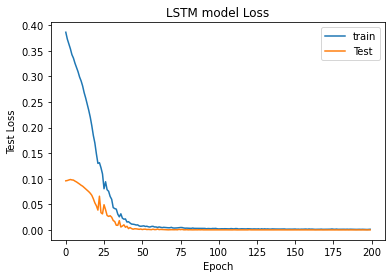

In [12]:
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.title('LSTM model Loss')
plt.ylabel('Test Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'Test'], loc='best')
plt.show()